In [88]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

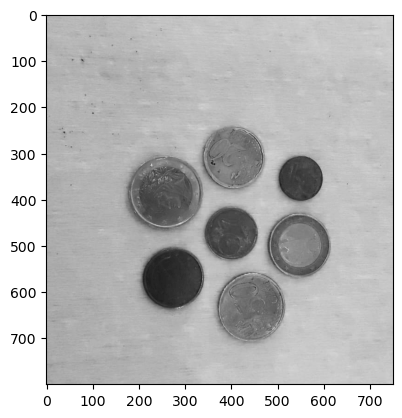

In [89]:
src_monedas_org = cv.imread("imagenes/moneda_servilleta.jpg")

src_monedas_org = src_monedas_org[400:1200,0:750 ]

src_monedas = src_monedas_org[:, :, 0]


plt.imshow(src_monedas,cmap="gray")

Text(0.5, 1.0, 'Limpio')

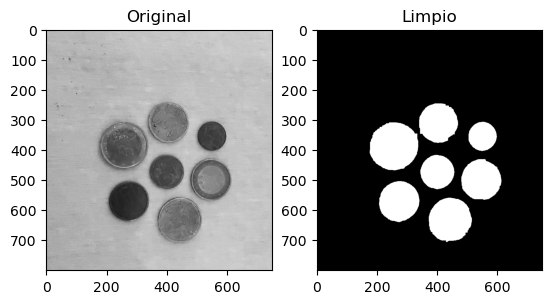

In [90]:
kernel = np.ones((5,5),np.uint8)
src_monedas_dif = cv.GaussianBlur(src=src_monedas, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_monedas_dif,127,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=3)

# kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=2)
erosion = cv.erode(src_monedas_clean,kernel,iterations=1)

fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(src_monedas,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosion,cmap="gray")
ax2.set_title("Limpio")

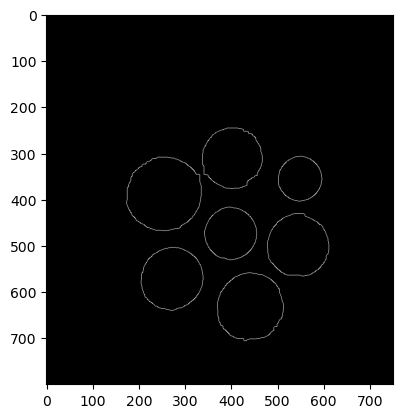

In [91]:

umbral_minimo = 50
umbral_maximo = 200
cn = cv.Canny(erosion, umbral_minimo, umbral_maximo)

plt.imshow(cn, cmap="gray")

7
Centro: 440, 632
Área: 16297.5  Perímetro: 492.71781623363495
Centro: 271, 571
Área: 14084.0  Perímetro: 449.78888523578644
Centro: 544, 500
Área: 13995.5  Perímetro: 448.71781599521637
Centro: 398, 474
Área: 9879.5  Perímetro: 374.91882717609406
Centro: 254, 388
Área: 20211.5  Perímetro: 541.0020889043808
Centro: 548, 355
Área: 7071.5  Perímetro: 315.80613029003143
Centro: 401, 310
Área: 13235.5  Perímetro: 445.6051193475723


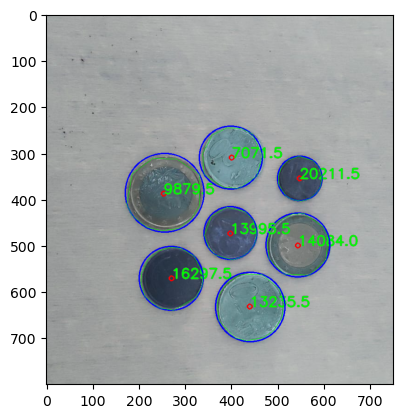

In [102]:

1
contornos, jerarquia = cv.findContours(cn.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
for cnt in range(len(contornos)):
  cnt = contornos[cnt]
  M = cv.moments(cnt)
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
    cv.circle(src_monedas_org, (cx, cy), 5, (255, 0, 0), 2)
    cv.putText(src_monedas_org,f'{area}',(cx, cy),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv.LINE_AA)
  area = cv.contourArea(cnt)
  perimetro = cv.arcLength(cnt, True)
  print(f"Área: {area}  Perímetro: {perimetro}")
  (x,y),radius = cv.minEnclosingCircle(cnt)
  cv.circle(src_monedas_org, (int(x), int(y)), int(radius), (0,0,255), 2)

  approx = cv.approxPolyDP(cnt, 0.01*perimetro, True )
  cv.drawContours(src_monedas_org, [approx], -1, (0,255,0), 1)
plt.imshow(src_monedas_org)